In [0]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs

fatal: destination path 'german-traffic-signs' already exists and is not an empty directory.


In [0]:
!ls german-traffic-signs/

signnames.csv  test.p  train.p	valid.p


In [0]:
import warnings
warnings.filterwarnings("ignore")

In [0]:

import pickle

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import random

In [0]:
with open('german-traffic-signs/train.p', 'rb') as f:
    train = pickle.load(f)
with open('german-traffic-signs/valid.p', 'rb') as f:
     valid = pickle.load(f)
# TODO: Load test data
with open('german-traffic-signs/test.p', 'rb') as f:
     test = pickle.load(f)
print(type(train))

X_train, y_train = train ['features'], train['labels']
X_val, y_val = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

<class 'dict'>


In [0]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']


In [0]:
X_train.shape

(34799, 32, 32, 3)

In [0]:
y_train.shape

(34799,)

In [0]:
def process_newimage_file(name):
    image = cv2.imread(name)
    image = cv2.resize(image,(32,32))
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image = image/255.-.5
    return image

In [0]:
data = pd.read_csv('german-traffic-signs/signnames.csv')
print(data)

    ClassId                                           SignName
0         0                               Speed limit (20km/h)
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vechiles over 3.5 metric tons
11       11              Right-of-way at the next intersection
12       12                                      Priority road
13       13                                              Yield
14       14                                            

37

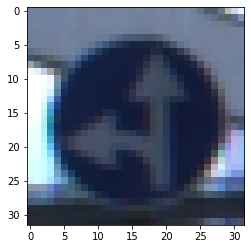

In [0]:
i = 5001
plt.imshow(X_train[i]) # Show images are not shuffled
y_train[i]

In [0]:
## Shuffle the dataset 
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [0]:
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)
X_test_gray  = np.sum(X_test/3, axis=3, keepdims=True)
X_validation_gray  = np.sum(X_validation/3, axis=3, keepdims=True) 

In [0]:
X_train_gray_norm = (X_train_gray - 128)/128 
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128


In [0]:
X_train_gray.shape

(34799, 32, 32, 1)

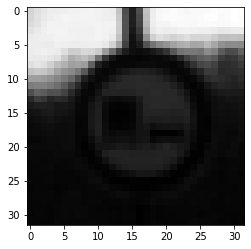

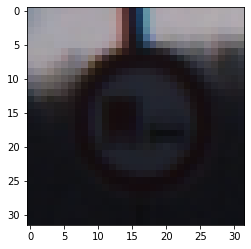

In [0]:
i = 610
plt.imshow(X_train_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_train[i])

In [0]:
# Import train_test_split from scikit library
# Import Keras
# import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

# from subprocess import check_output
from sklearn.model_selection import train_test_split

In [0]:
image_shape = X_train_gray[i].shape

In [0]:
cnn_model = Sequential()
cnn_model.add(Conv2D(32,3, 3, input_shape = image_shape, activation='relu'))
cnn_model.add(Conv2D(32,3, 3, input_shape = image_shape, activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dropout(0.4))
cnn_model.add(Dense(output_dim = 32, activation = 'relu'))

cnn_model.add(Dense(output_dim = 43, activation = 'softmax'))

In [0]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

In [0]:
history = cnn_model.fit(X_train_gray_norm,
                        y_train,
                        batch_size=500,
                        nb_epoch=50,
                        verbose=1,
                        validation_data = (X_validation_gray_norm,y_validation))

Train on 34799 samples, validate on 4410 samples
Epoch 1/50
34799/34799 [==============================] - 70s 2ms/step - loss: 2.8791 - acc: 0.2716 - val_loss: 2.0597 - val_acc: 0.4463
Epoch 2/50
34799/34799 [==============================] - 69s 2ms/step - loss: 1.2058 - acc: 0.6820 - val_loss: 0.8921 - val_acc: 0.7610
Epoch 3/50
34799/34799 [==============================] - 70s 2ms/step - loss: 0.5432 - acc: 0.8563 - val_loss: 0.6295 - val_acc: 0.8202
Epoch 4/50
34799/34799 [==============================] - 69s 2ms/step - loss: 0.3441 - acc: 0.9126 - val_loss: 0.5386 - val_acc: 0.8546
Epoch 5/50
34799/34799 [==============================] - 70s 2ms/step - loss: 0.2531 - acc: 0.9356 - val_loss: 0.4787 - val_acc: 0.8717
Epoch 6/50
34799/34799 [==============================] - 70s 2ms/step - loss: 0.1989 - acc: 0.9496 - val_loss: 0.4630 - val_acc: 0.8839
Epoch 7/50
34799/34799 [==============================] - 69s 2ms/step - loss: 0.1641 - acc: 0.9577 - val_loss: 0.4226 - val_acc:

In [0]:
score = cnn_model.evaluate(X_test_gray_norm, y_test,verbose=0)

print('Test score:', score[0])

print('Test Accuracy : {:.4f}'.format(score[1]))

Test score: 0.3058023150592913
Test Accuracy : 0.9361


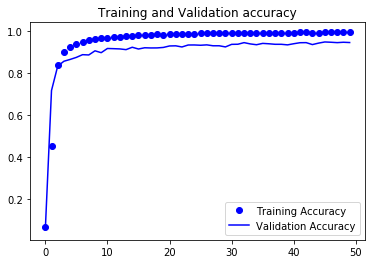

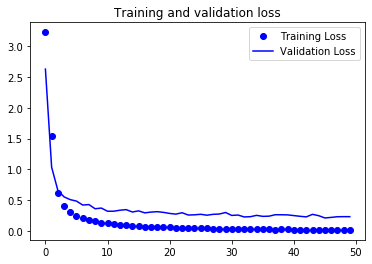

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
#get the predictions for the test data
predicted_classes = cnn_model.predict_classes(X_test_gray_norm)
#get the indices to be plotted
y_true = y_test


In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
cm

array([[ 53,   4,   0, ...,   0,   0,   0],
       [  4, 693,  13, ...,   0,   0,   0],
       [  0,   6, 741, ...,   0,   0,   0],
       ...,
       [  0,   1,   0, ...,  80,   0,   0],
       [  0,   0,   0, ...,   0,  33,   0],
       [  0,   0,   0, ...,   0,  14,  73]])

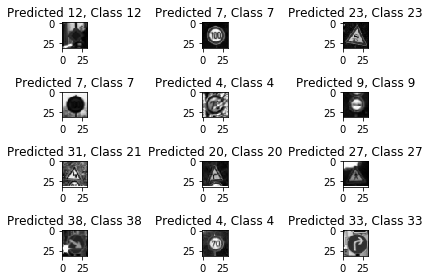

In [0]:
for i in range(0,12):
    plt.subplot(4,3,i+1)
    plt.imshow(X_test_gray_norm[i+10].squeeze(), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[i+10], y_true[i+10]))
    plt.tight_layout()